<a href="https://colab.research.google.com/github/NMashalov/2023_OpenMipt_course/blob/main/lesson7/boosting_sem_1_empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import plot_tree

import scipy

sns.set(font_scale=1.8, palette='Set2')

# Простая часть

Сгенерируем данные.

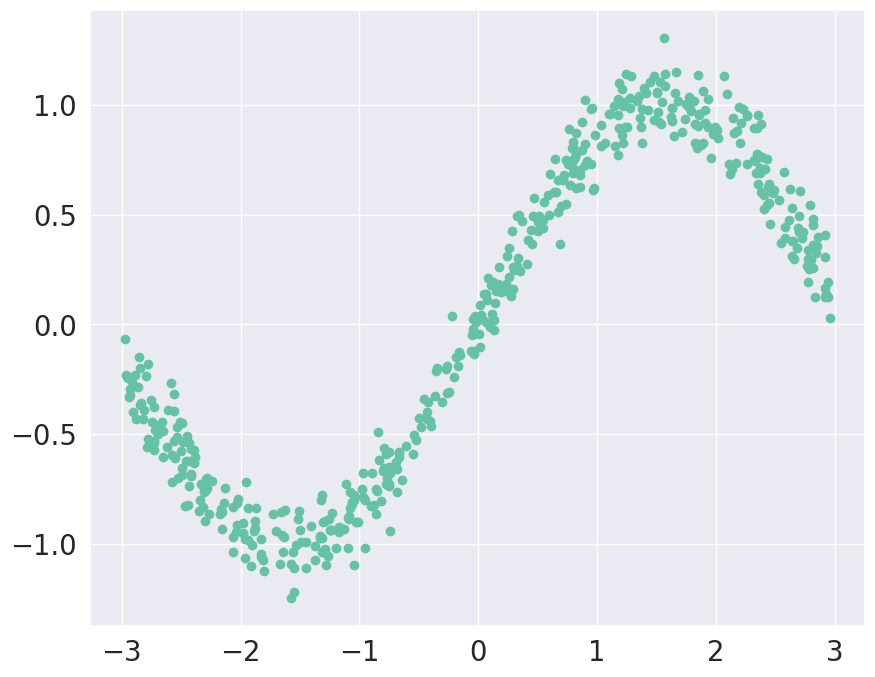

In [2]:
np.random.seed(42)
X_train = scipy.stats.uniform.rvs(loc=-3, scale = 6, size=(500, 1))
y_train = np.ravel(np.sin(X_train)) + scipy.stats.norm.rvs(scale=0.1, size=500)

plt.figure(figsize=(10, 8))
plt.scatter(X_train, y_train)

plt.show()

In [3]:
X_train.shape, y_train.shape

((500, 1), (500,))

Обучите градиентный бустинг `GradientBoostingRegressor` с параметром `learning_rate=1` и 10 деревьями.

In [5]:
regressor = GradientBoostingRegressor(n_estimators=10,learning_rate=1).fit(X_train,y_train)


Выведите параметры бустинга. Какие деревья используются в бустинге по умолчанию?

In [9]:
regressor, regressor.estimators_

(GradientBoostingRegressor(learning_rate=1, n_estimators=10),
 array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x79AB032FB640)],
        [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x79AB032FB640)],
        [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x79AB032FB640)],
        [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x79AB032FB640)],
        [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x79AB032FB640)],
        [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x79AB032FB640)],
  

**Ответ** по умолчанию решаются решающие деревья  из

Нарисуйте первые 5 деревьев бустинга. Какие они?

In [10]:
regressor.estimators_.shape

(10, 1)

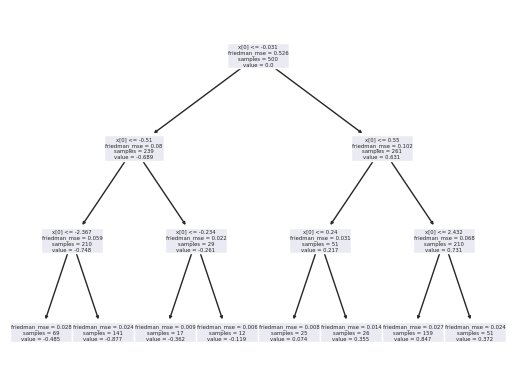

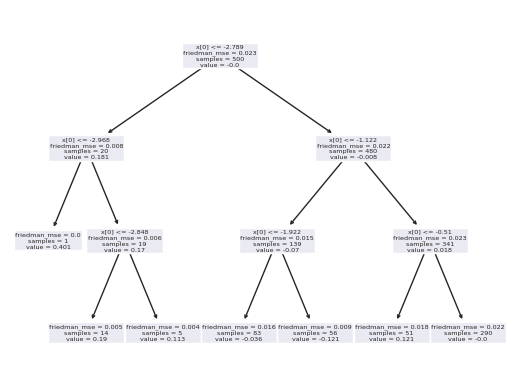

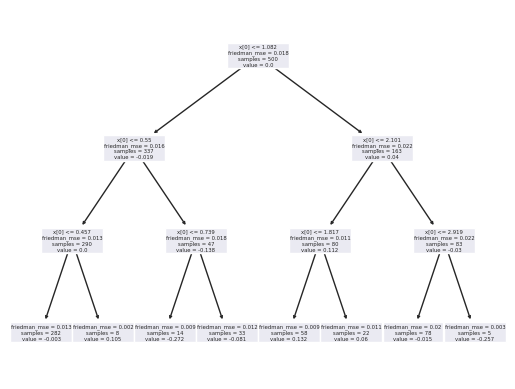

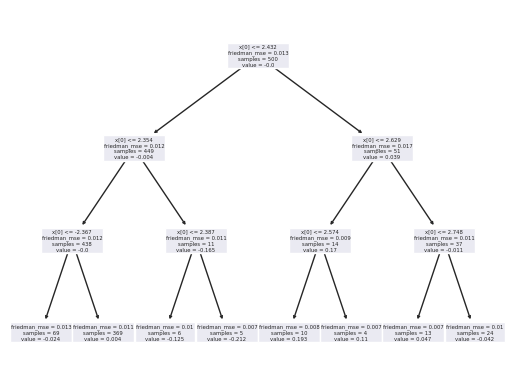

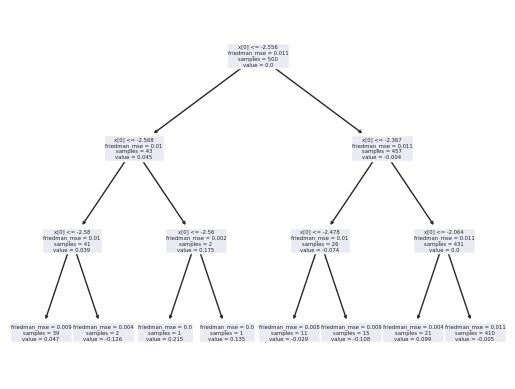

In [13]:
from sklearn.tree import plot_tree
for elem in regressor.estimators_[:5]:
    plot_tree(elem[0])
    plt.show()

**Ответ** деревья прорастают на максимально возможную глубину

У бустинга есть метод `staged_predict`. Он выдает предсказания композиции первых $i$ моделей бустинга. Используя этот метод, нарисуйте для каждого  $i$ два графика:
* График предсказаний первых $i$ моделей и истинных ответов;
* График ошибки на шаге $i$ и предсказаний $i$-й компоненты бустинга.

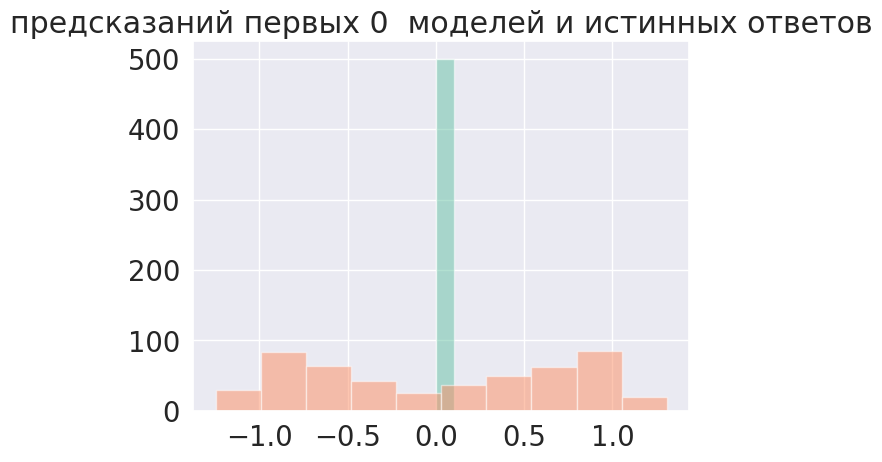

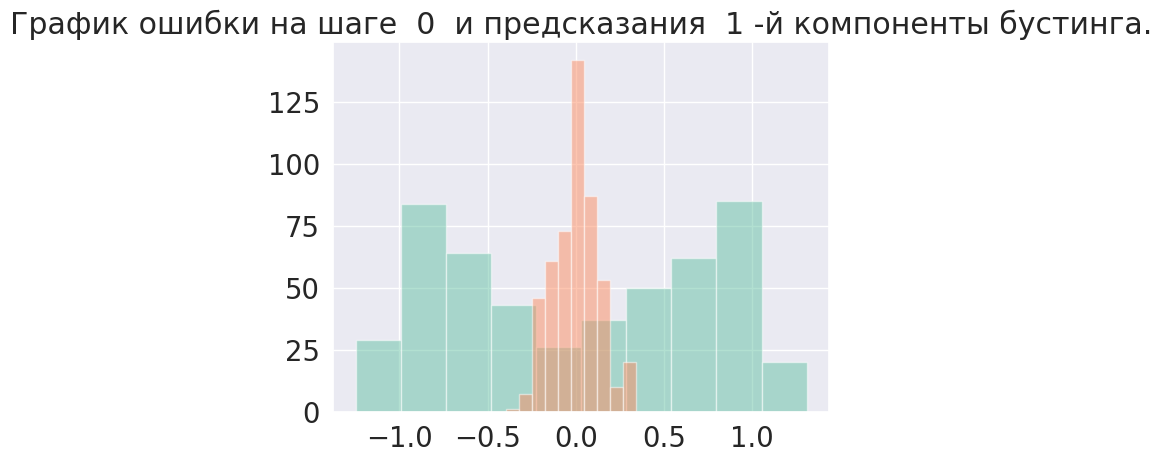

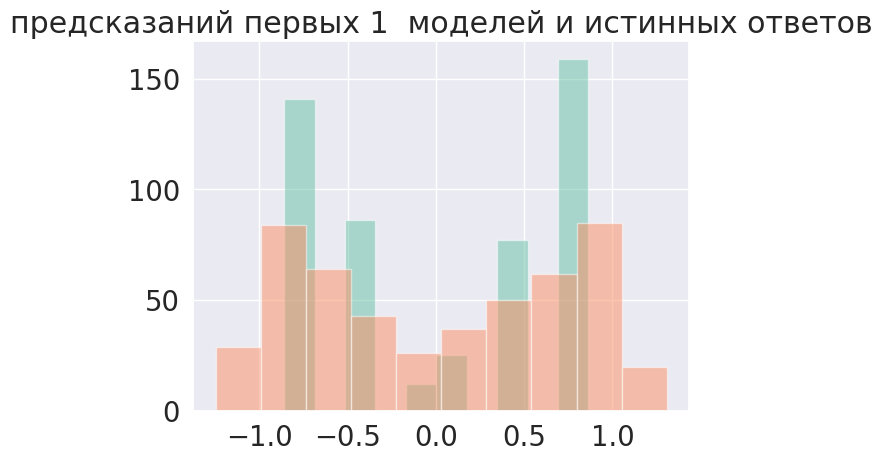

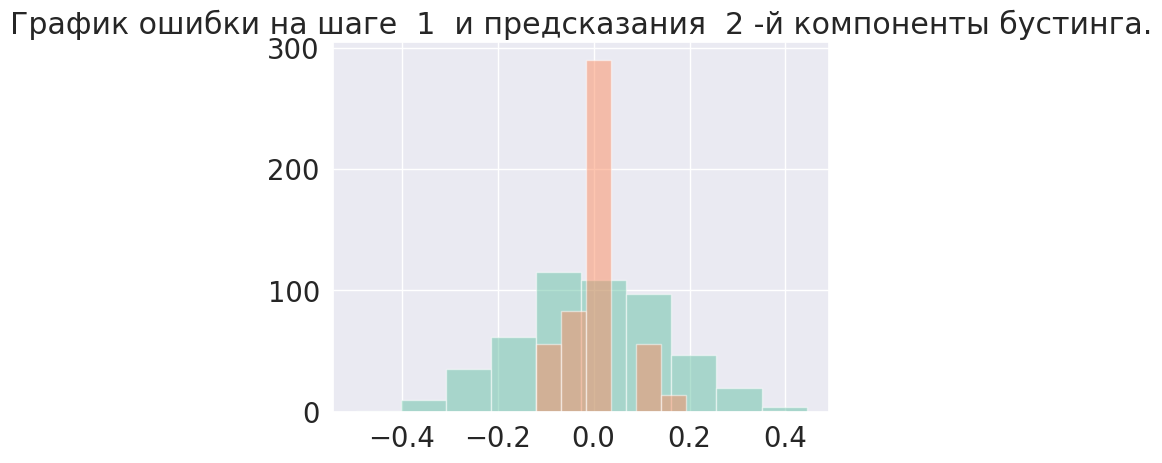

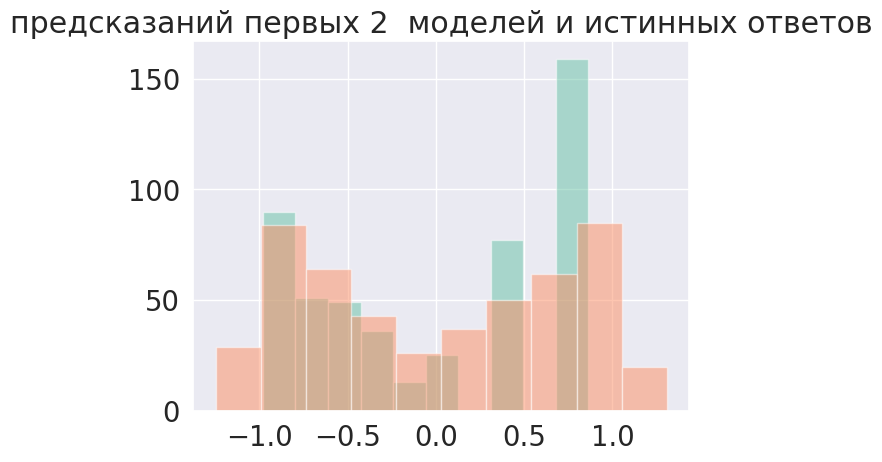

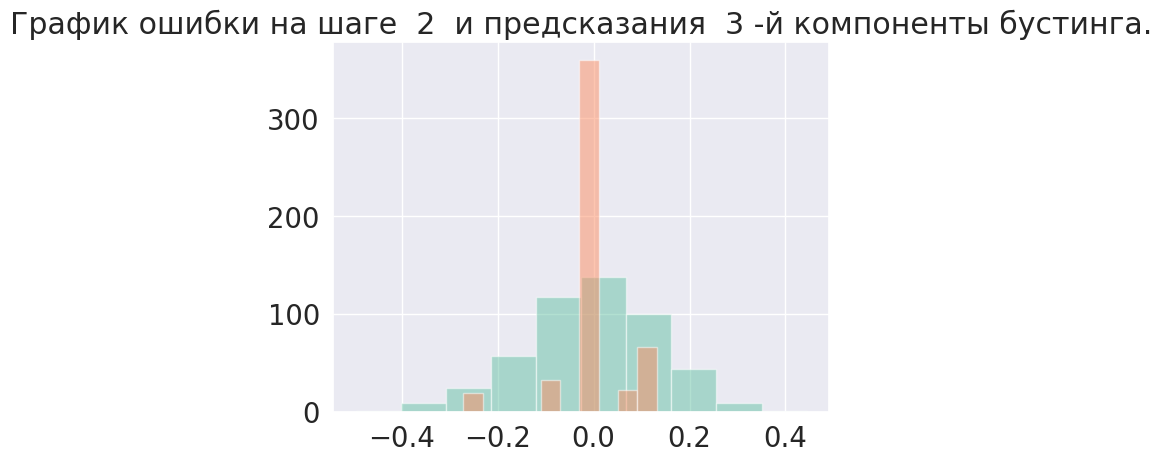

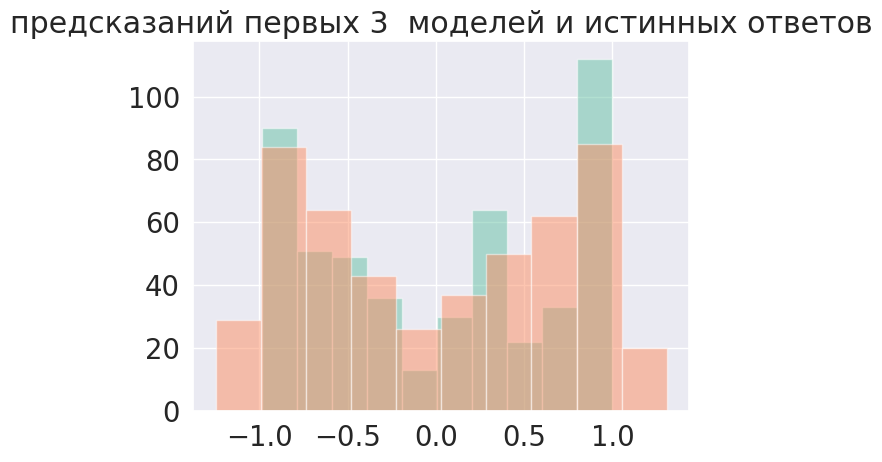

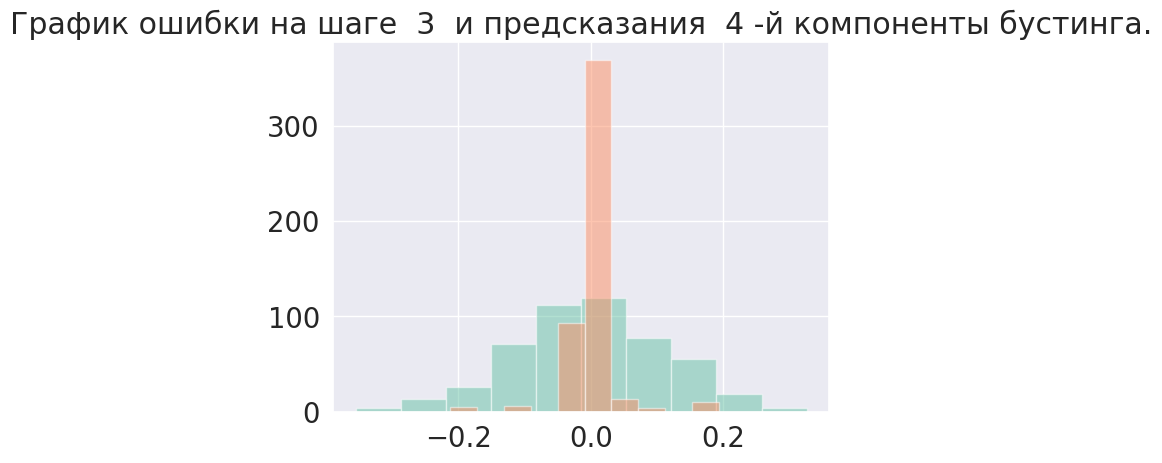

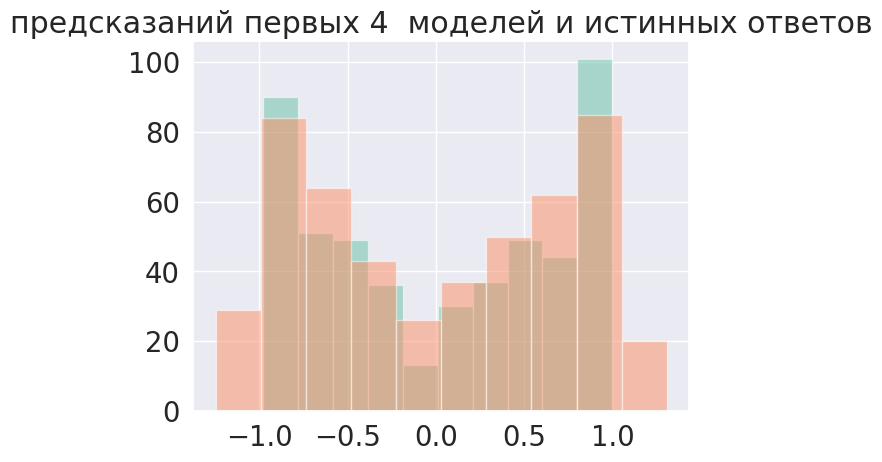

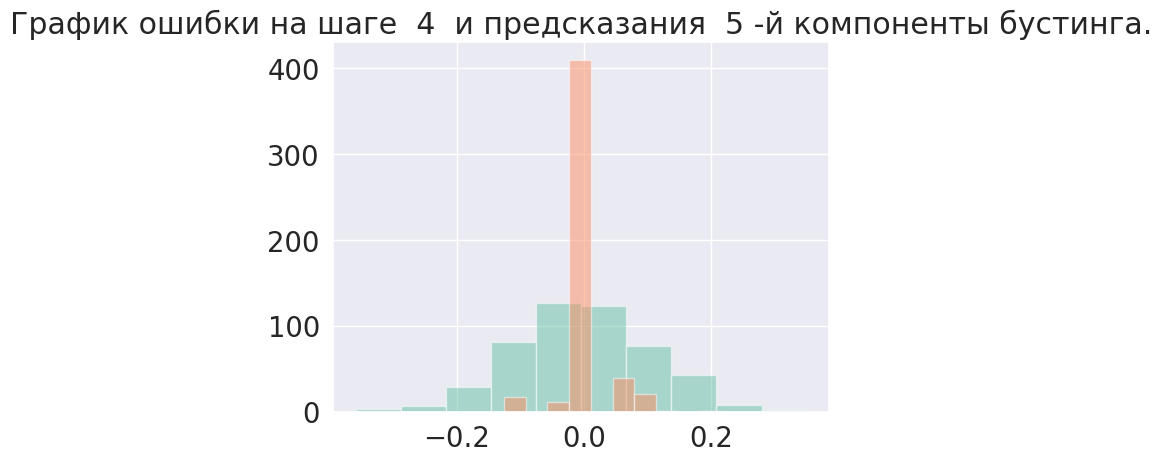

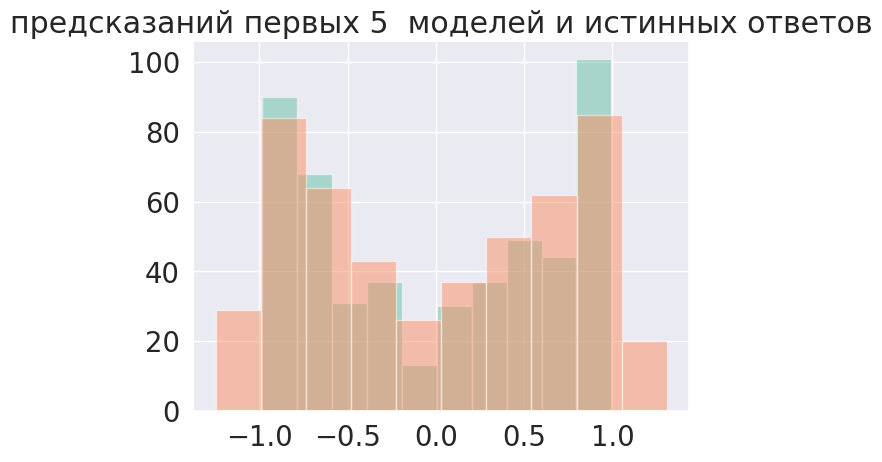

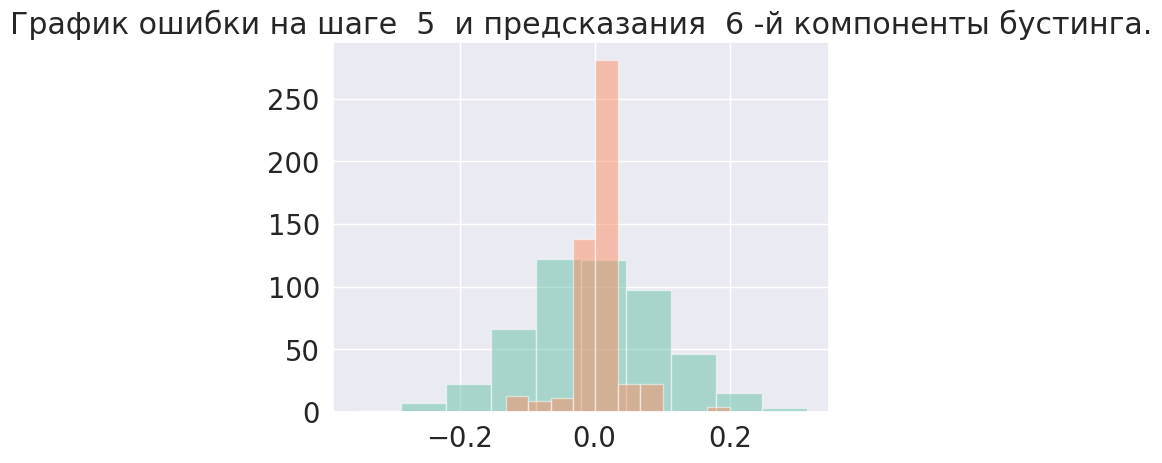

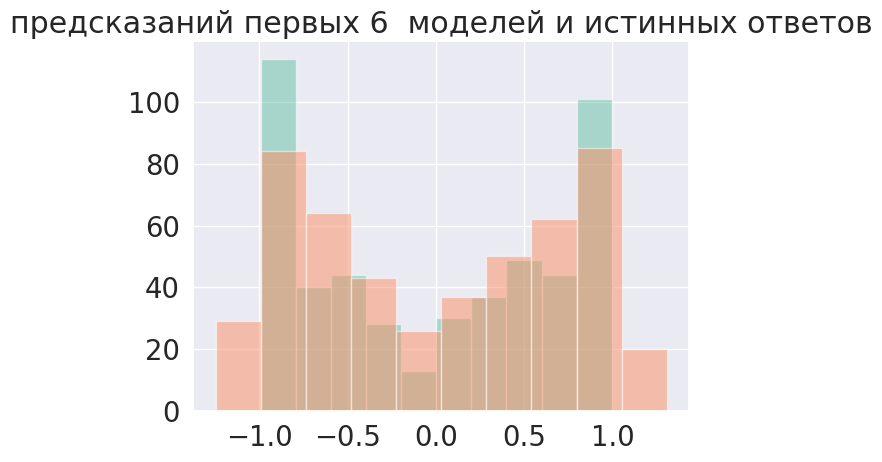

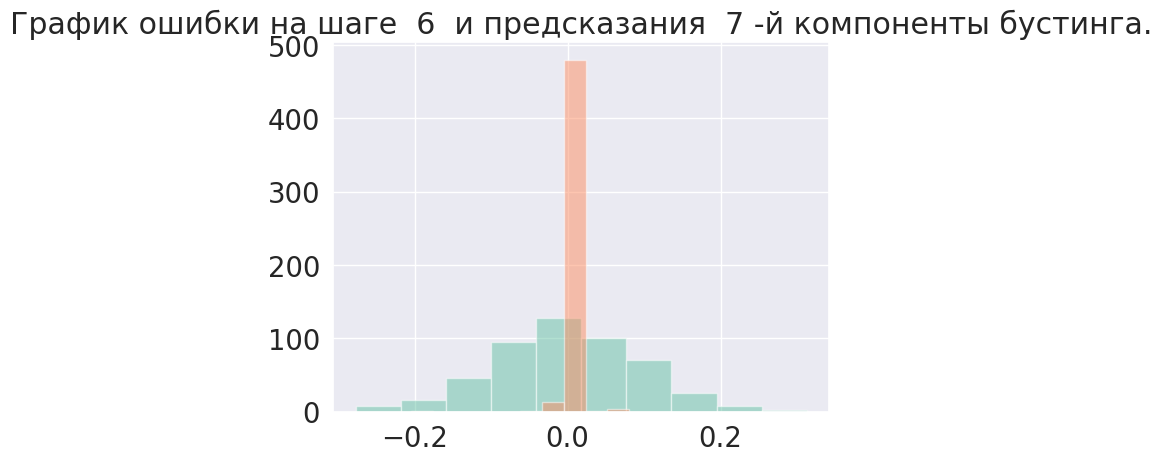

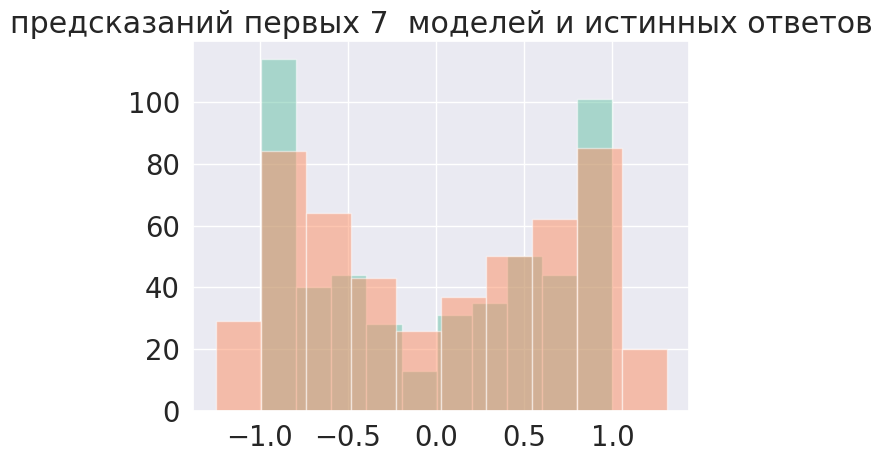

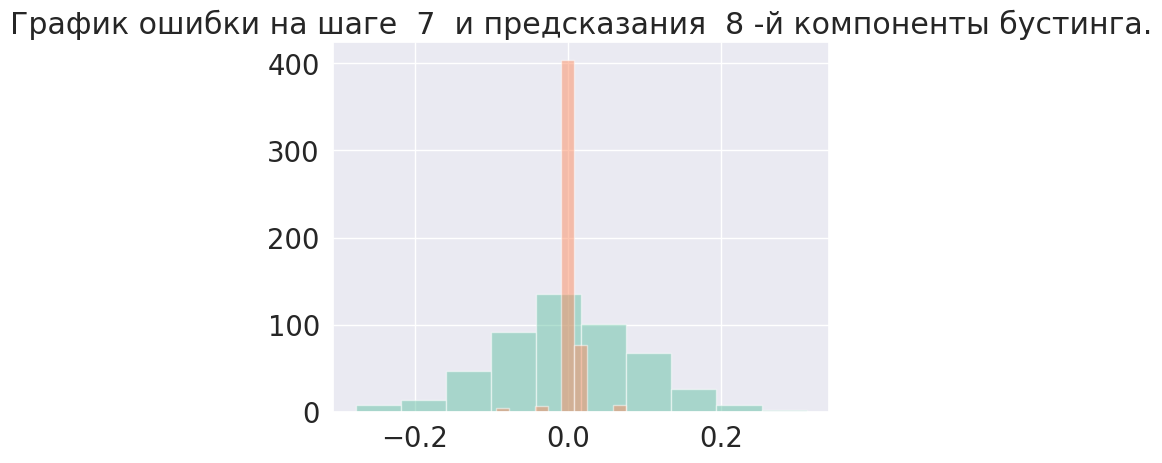

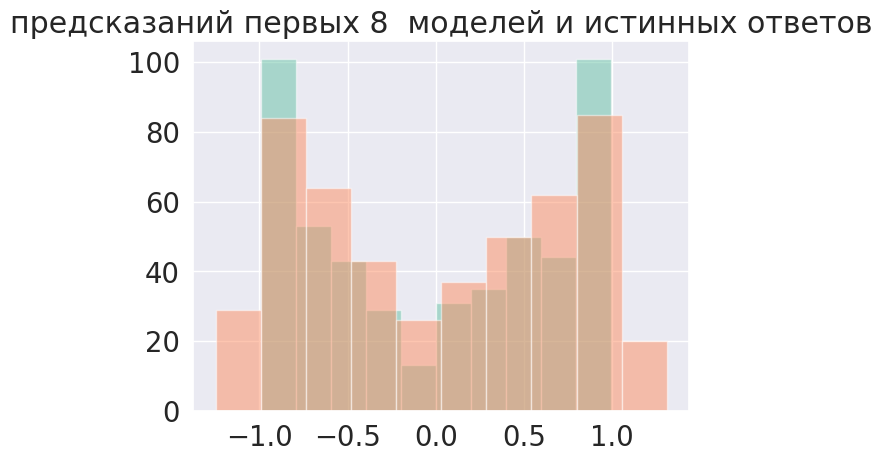

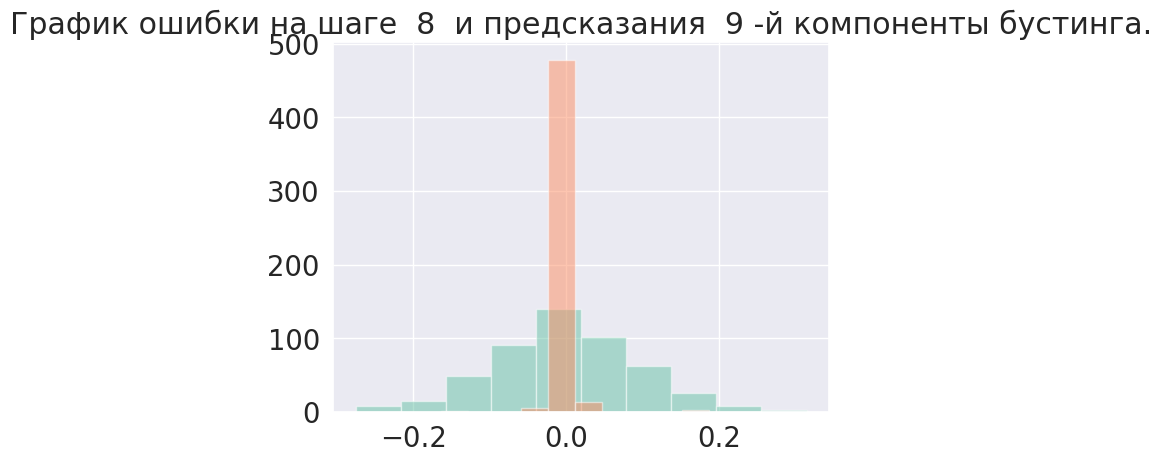

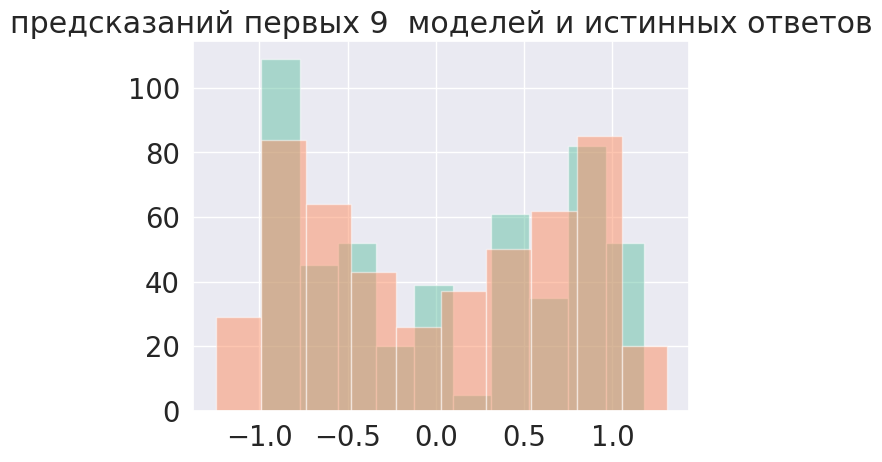

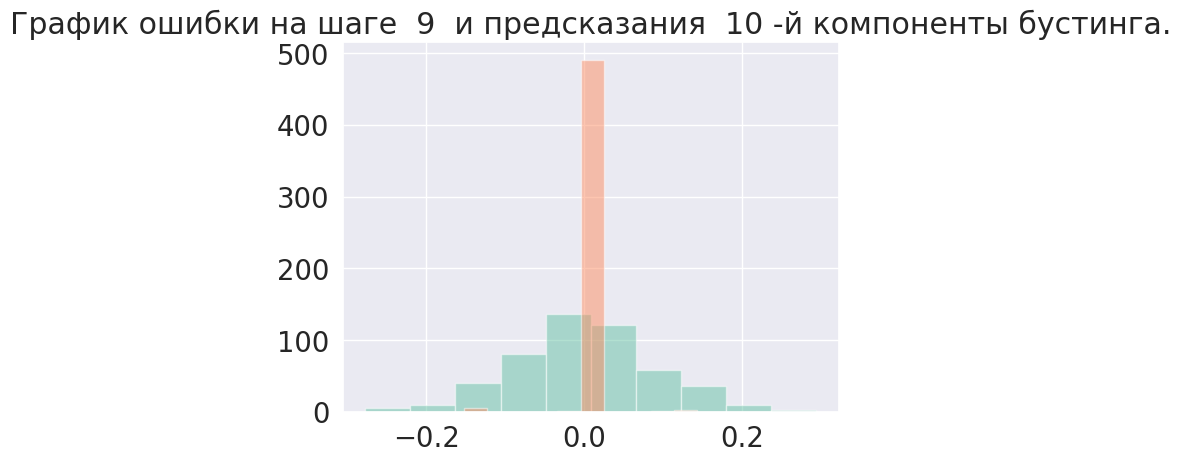

In [28]:
staged = list(regressor.staged_predict(X_train))

for i in range(10):
    if i == 0:
      previous_predict = [0]*len(X_train)
    else:
      previous_predict = staged[i-1]

    error = y_train - previous_predict
    current_step_predict = staged[i] - staged[i-1]

    # построение графиков
    plt.hist(previous_predict,alpha=0.5,label=f'предсказаний первых {i} моделей')
    plt.hist(y_train,alpha=0.5,label=f'истинные ответы')
    plt.title(f'предсказаний первых {i}  моделей и истинных ответов')
    plt.show()
    plt.hist(error,alpha=0.5,label=f'ошибки на шаге  {i}')
    plt.hist(current_step_predict,alpha=0.5,label=f'предсказания {i} -й компоненты бустинга')
    plt.title(f'График ошибки на шаге  {i}  и предсказания  {i+1} -й компоненты бустинга.')
    plt.show()


Сделайте вывод. Как выглядят графики на разных шагах? Как обучается бустинг?

**Вывод**

Наблюдаем как бустинг итерационно изменяет распределение ошибки предсказания с бимодального распределения в нормальное со средним равным нулю и уменьшающейся дисперсией с ростом итерации -> остаётся только истинный случайный шум заложенный в измерениях

Бустинг некорректирует все ошибки за раз. Как правило распределение нового предсказания достаточно узко: хорошие предсказания не корректируются, плохие - иттеративно малыми шагами